# Pêndulo de Wilberforce

* PET - Física UFRN
* Petiano: Gabriel Zuza
* Data: 02/2021

O Objetivo desse `Notebook`  não é abordar de forma teórica as deduções e métodos envolvidos nos problemas, mas na prática, aplicar tais conceitos obtendo resultados concretos e representativos.

Já publicamos sobre o [Pêndulo Simples e Forçado](https://github.com/GabrielZuza/PET/blob/master/Pendulo_Simples.ipynb) e tambem sobre as [Curvas de Lissajous](https://github.com/GabrielZuza/PET/blob/master/Curva_de_lissajous.ipynb), e ainda sobre o [Pendulo Duplo](https://github.com/GabrielZuza/PET/blob/master/Duble_Pendulum.ipynb) todos esses projetos resolvendo o oscilador hamonico. E nesse `Notebook` vamos resolver o Pêndulo de Wilberforce. Para tanto, usaremos da Mecânica Lagrangeana.

## Introdução Teórica

O Pendulo de Wilberforce idealizado pelo físico britânico Lionel Wilberforce, [neste artigo$^1$](https://doi.org/10.1119/1.16702) consiste em uma massa suspensa por uma mola heicoidal e livre para oscilar verticalmente, assim como torcer a a mola. Ele é um perfeito exemplo de oscilador mecânico acoplado.

O comportamento desse pêndulo é muito interessante, ele começa inicialmente somente com movimento translacional (oscilando para cima e para baixo) e vai gradualmente alterando para o movimento rotacional, até parar de se mover verticalmente e só ter energia rotacional, esse processo se repete intermitentemente se não ouver atrito

De início vamos definir nosso referêncial.Consideremos um problema bi-dimensional com o eixo $Z$ na vertical, e $\theta$ como angulo polar.

O Sistema está exposto a um campo gravitacional $g$ em $\hat{z}$;

Além disso, vamos considerar que o bloco suspenso tem massa $m$ e momento de inercia $I$, que a mola não tem massa e tem uma constante de de restauração linear $k$, assim como uma constante de restauração angular $\delta$. Assumindo uma sistema linearmente acoplado na forma de $\epsilon \theta z / 2$

Conforme esquematizado na figura abaixo:

![Esquema](https://www.researchgate.net/publication/330787674/figure/fig1/AS:721542619086848@1549040574014/A-sketch-of-our-prototype-of-the-Wilberforce-pendulum-at-its-equilibrium-state-a-and-in.ppm)

<iframe width="560" height="315" src="https://www.youtube.com/embed/S_f2qV2_U00?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>

Para calcular a Lagrangeana, prescisamos obter expressões para a Energia Potencial e para a Energia Cinética. Como já derivamos as equações acima, basta aplicar nas definições.

Para energia potencial (Chamaremos de $ V $) Temos:


Lembrando que usaremos a seguinte notação: $\frac{d\theta}{dt} \equiv \dot{\theta}$ e $\frac{d^2\theta}{dt^2} \equiv \ddot{\theta}$

$$ \large{V = \frac{k\dot{z}^2}{2} + \frac{\delta\dot{\theta}^2}{2} + \frac{\epsilon\theta z}{2} } $$

Perceba que esses termos correspondem, respectivamente, à energia potencial armazenada translacionalmente na mola, à energia potencial rotacinal da mola e o termo de acoplamento

Já para a energia cinética (Chamaremos de $T$), Temos:

$$\large{ T = \frac{m\dot{z}^2}{2} + \frac{I\dot{\theta}^2}{2}}$$

Veja que os termos representam, respectivamente, a energia cinética translacionalmente e a energia cinética angular

Relembrando a definição de Lagrangeana, $\mathcal{L} = T - V$, aplicando as expreções obtidas acima, Obtemos:

$$\large{\mathcal{L} = \frac{m\dot{z}^2}{2} + \frac{I\dot{\theta}^2}{2} - \frac{k\dot{z}^2}{2} - \frac{\delta\dot{\theta}^2}{2} - \frac{\epsilon\theta z}{2}} $$

Da Equação de Euler-Lagrange, para problemas onde $f(x) \equiv \mathcal{L}$, sabemos que:

$$\large{\frac{\mathrm{d}}{\mathrm{d}t}\left(\frac{\partial\mathcal{L}}{\partial \dot{q}_i}\right) - \frac{\partial \mathcal{L}}{\partial q_i} = 0}$$ 

Onde, para nosso caso $q_i = \{z, \theta\}$.

Aplicando Euler-Lagrange para $z$ temos:

$$\large{ \frac{d}{dt}(m\dot{z}) - \left( -kz - \frac{\epsilon\theta}{2} \right)} = 0$$

$$\large{ m\ddot{z} + kz +   \frac{\epsilon\theta}{2} } = 0$$

Similarmente, aplicando Euler-Lagrange para $\theta$ temos:

$$\large{ \frac{d}{dt}(I\dot{\theta}) - \left( -\delta\theta - \frac{\epsilon z}{2} \right)} = 0$$

$$\large{ I\ddot{\theta} + \delta \theta + \frac{\epsilon z}{2} =0}$$

Assim, obtemos as duas equações de movimento. Agora antes de implementa-las, como vamo resolver essas equações numericamentes, pelo método de Runge-Kutta de $4^a$ ordem, é presciso de separar essas duas equações de segunda ordem em 4 equações de primeira ordem, usando variáveis auxiliares

Além disso, vamos juntar algumas constantes por simplificação, vamos definir $\omega_z = \sqrt{k/m}$ e $\omega_\theta = \sqrt{\delta/I}$, que tem sentido físico na verdade são os modes de frequencias quando se resolve esse problema analiticamente. Por fim, vamos implementar como $ \omega_z = \omega_\theta = \omega$, para fins de simplificação.

$$ \large{ a \equiv \dot{\theta} \;\;, \;\;  b \equiv \dot{z}}$$

$$\large{ \dot{a} = -\omega^2z - \frac{\epsilon}{2m}\theta}\;\; ,\;\;  \dot{b}= -\omega^2\theta - \frac{\epsilon}{2I}z$$

Pronto! Agora vamos implementar essas equações.

## Importando Bibliotecas e Definindo Constantes

In [9]:
import os
import moviepy.video.io.ImageSequenceClip
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [10]:
omega = 2   
epsilon = 1e-2
m = 0.5
I = 1e-4

## Implementando as Equações

In [11]:
def eq(t, y):
    global  omega, epsilon, m, I
    z, zponto, theta, thetaponto = y
    b = zponto
    b_ponto = -omega**2 * z - (epsilon * theta) / (2 * m)
    a = thetaponto
    a_ponto = -omega**2 * theta - (epsilon * z) / (2 * I)
    return b, b_ponto, a, a_ponto

Vamos iniciar nosso modelo com $z=0$,$\dot{z}=0$,$\theta=90^0$ e $\dot{\theta}=0$. Ou seja, sem velocidade inicial em z e na posição de equilíbrio, porém com uma torção em $90^0$ angularmente e também no repouso 

In [12]:
y0 = [0, 0, np.deg2rad(90), 0]

Resolvendo as EDO's acopladas usando uma [função do Scipy](https://docs.scipy.org/doc/scipy/reference/optimize.nonlin.html) para ter benefício no custo computacional, já que essas rotinas já estão otimizadas.

In [13]:
tmax = 60
soln = solve_ivp(eq, (0, tmax), y0, dense_output=True)
t = np.linspace(0, tmax, 1000)

Agora, vamos desempacotar a solução, selecioando a primeira e terceira coluna, que correspondem respectivamente a $z$ e $\theta$, como já comentado anteriormente.

In [14]:
z_sol, theta = soln.sol(t)[0], soln.sol(t)[2]

## Plotando

Por esse problema ter alguns graus de liberdade, vamos poder nos divertir um pouco e representar-lo em diversos plots.

### Visualizando o Pendulo em 3D

Inicialmente vamos definir algumas funções que vão nos auxiliar a poupar linhas no futuro;

Função $f(x,lem)$ recebem dois escalares $x$ e $lem$, e retorna um vetor de comprimento $lem$ onde cada uma das coordenadas do vetor contem o escalar $x$. Por exemplo $f(0,4) = (0,0,0,0)$.

In [15]:
def f(x,lem):
    v = []
    for k in range(lem):
           v.append(x)
    return v

Para melhor visualizar o problema, vamos representar o desenho sem escala. vamos usar um laço $for$ que passará por cada iteração da EDO e gerará uma representação 3D do pêndulo naquele instante.

In [ ]:
save_folder = 'Pendulo'
for k in range(len(theta)):
    
    fig = plt.figure(figsize=(9,9))
    ax = fig.gca(projection='3d')
    u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
    n=200
    
    z_differ = z_sol[k]*7
    x = np.cos(u)*np.sin(v)*0.05
    y = np.sin(u)*np.sin(v)*0.05
    z = np.cos(v)*0.05 + z_differ  
    
    #Desenhando a bola
    ax.plot_surface(x, y, z,color='b')
    
    #Desenhando a Mola
    line, = ax.plot(f(0,n),f(0,n), np.linspace(1,0+z_differ,n))

    #Desenhando os bastões
    ax.plot(np.linspace(0,2.5*0.05,n),f(0,n), f(z_differ,n),color='r')
    ax.plot(np.linspace(0,-2.5*0.05,n),f(0,n), f(z_differ,n),color='r')
    ax.plot(f(0,n),np.linspace(0,2.5*0.05,n), f(z_differ,n),color='r')
    ax.plot(f(0,n),np.linspace(0,-2.5*0.05,n), f(z_differ,n),color='r')
    
    #desenhando a massa na ponta dos bastões
    xs = [0,0,2.5*0.05,-2.5*0.05,0]
    ys = [2.5*0.05,-2.5*0.05,0,0,0]
    zs = [z_differ,z_differ,z_differ,z_differ,1]
    ax.scatter(xs, ys, zs, marker='o',color='r',alpha=1)

    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_axis_off()
    ax.set_zlim(-0.3,0.3)
    ax.set_xlim(-0.3,0.3)
    ax.set_ylim(-0.3,0.3)


    ax.azim = np.rad2deg(theta[k])
    plt.savefig('{}/img{:03d}.png'.format(save_folder, k), bbox_inches='tight',dpi=300)
    #print(k,end='') #se quiser use essa célula para ter uma noção do progesso 

Agora vamos compilar todas as imagens geradas em um vídeo usando a biblioteca [moviepy](https://pypi.org/project/moviepy/), que provavelmente será necessário fazer sua instalação já que ela não veem instalada nas principais IDLs de python como o [Anaconda Navigator](https://docs.anaconda.com/anaconda/navigator/). Mas esse procedimento é fácil e pode ser encontrado com mais detalhes na documentação do [moviepy](https://pypi.org/project/moviepy/). 

Para as maiorias das máquinas a intalação pode ser feita ao rodar a linha
```pip install moviepy```
Diretamente no terminal.

In [ ]:
image_folder='Pendulo'
fps=20

image_files = [image_folder+'/'+img for img in os.listdir(image_folder) if img.endswith(".png")]
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile('Pendulo_Wilberforce.mp4')

Moviepy - Building video Pendulo_Wilberforce.mp4.
Moviepy - Writing video Pendulo_Wilberforce.mp4



Moviepy - Done !
Moviepy - video ready Pendulo_Wilberforce.mp4


In [16]:
from IPython.display import HTML

HTML('<iframe src="https://player.vimeo.com/video/509074721" width="640" height="564" frameborder="0" allow="autoplay; fullscreen" allowfullscreen></iframe>')

### Plotando em 2D

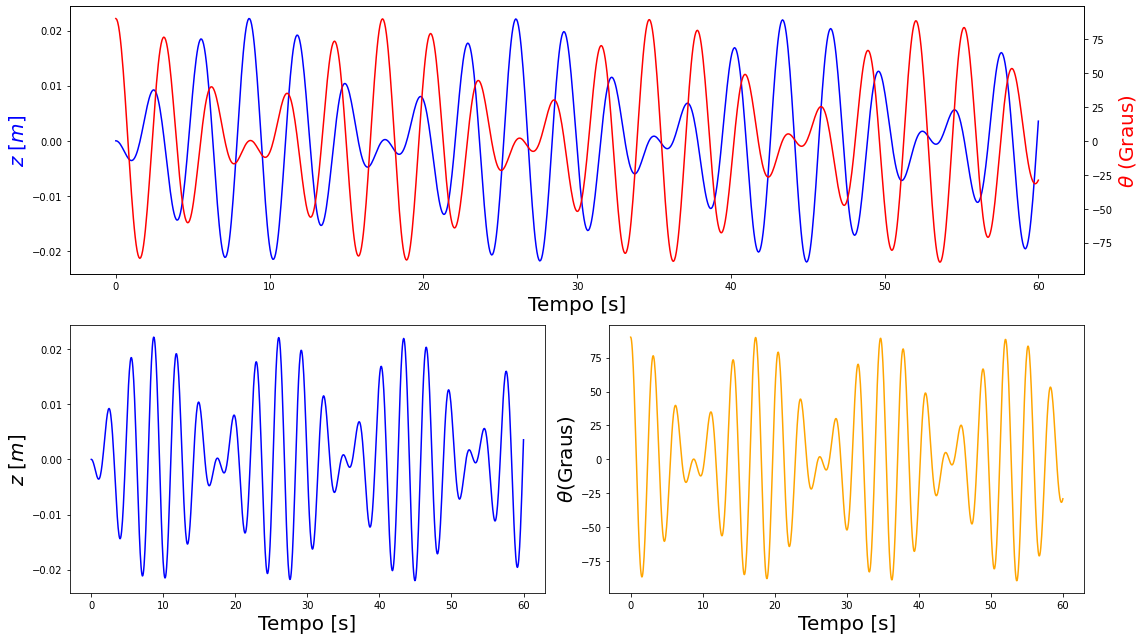

In [17]:
thetadeg = np.rad2deg(theta)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,9))
ax2 = ax1.twinx()
ax1.plot(t, z_sol, color='b')
ax1.set_xlabel('Tempo [s]',fontsize=20)
ax1.set_ylabel(r'$z$ [$m$]',fontsize=20, color='b')
ax2.plot(t, thetadeg, color='r')
ax2.set_ylabel(r'$\theta$ (Graus)',fontsize=20, color='r')
plt.subplot(223)
plt.plot(t, z_sol, 'b', label=r'$z$')
plt.ylabel(r'$z$ [$m$]',fontsize=20)
plt.xlabel('Tempo [s]',fontsize=20)
plt.subplot(224)
plt.ylabel(r'$\theta$(Graus)',fontsize=20)
plt.xlabel('Tempo [s]',fontsize=20)
plt.plot(t, thetadeg, 'orange', label=r'$\theta$')
plt.tight_layout()
plt.show()

Plotando $\theta \;$versus$\; z$:


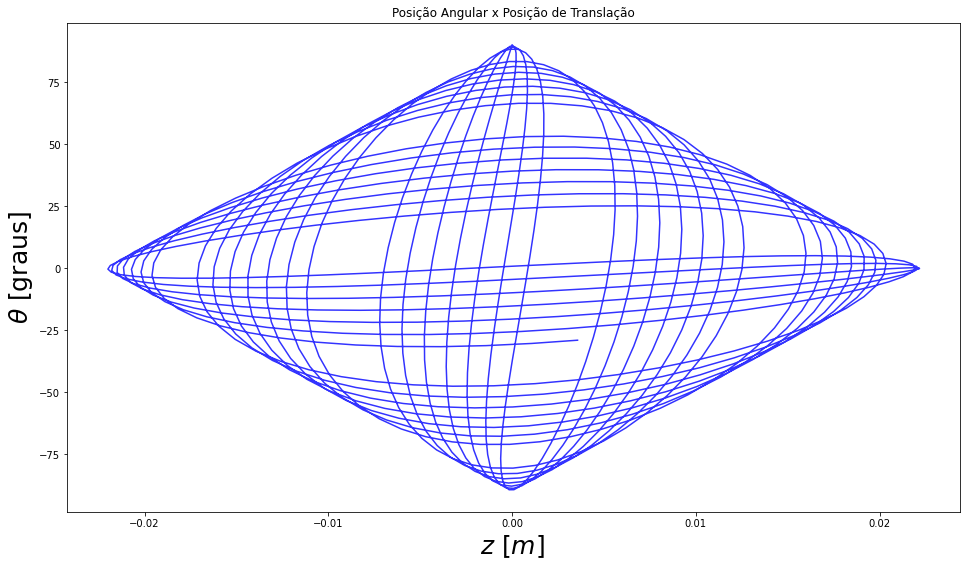

In [18]:
fig = plt.figure(figsize=(16,9))
plt.title("Posição Angular x Posição de Translação")
plt.plot(z_sol, thetadeg, 'b', alpha=0.8)
plt.xlabel(r'$z$ [$m$] ',fontsize=25)
plt.ylabel(r'$\theta$ [graus]',fontsize=25)
plt.show()

# Referências

[1] - Berg, R. E. and Marshall, T. S., “Wilberforce pendulum oscillations and normal modes”, <i>American Journal of Physics</i>, vol. 59, no. 1, pp. 32–38, 1991. [doi:10.1119/1.16702](https://doi.org/10.1119/1.16702).
